In [37]:
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

from src.utils import get_lra_properties, get_parcel_and_shape

In [38]:
parcel, shape = get_parcel_and_shape()

In [39]:
# shape

In [40]:
# shape['coordinate'] = shape['geometry'].map(
#     lambda x: list(x.exterior.coords) if isinstance(x, Polygon)
#     else [list(e.exterior.coords) for e in x])
# shape

In [41]:
# shape['bound'] = shape['geometry'].map(
#     lambda x: x.bounds if isinstance(x, Polygon)
#     else [e.bounds for e in x])

In [42]:
min_x, min_y, max_x, max_y = shape['geometry'].total_bounds

In [43]:
shape['geometry'] = shape['geometry'].translate(-min_x, -max_y)
shape

,HANDLE,geometry,centroid
0,10001000005,"POLYGON ((38171.530 -56674.969, 38164.906 -566...",POINT (589444.235 1014278.510)
1,10001000010,"MULTIPOLYGON (((38188.504 -56622.298, 38188.17...",POINT (589485.905 1014388.319)
2,10001000020,"POLYGON ((38228.681 -56431.442, 38216.325 -564...",POINT (589478.254 1014449.720)
3,10001000032,"POLYGON ((38302.126 -56731.335, 38295.907 -567...",POINT (589611.308 1014223.377)
4,10001000034,"POLYGON ((38281.564 -56722.460, 38280.723 -567...",POINT (589562.847 1014231.738)
...,...,...,...
127619,19121000175,"POLYGON ((39404.236 -373.573, 39388.268 -139.8...",POINT (590803.027 1070664.087)
127620,19121000185,"POLYGON ((41136.868 -581.596, 41037.728 -796.8...",POINT (591650.375 1070447.073)
127621,19121000250,"POLYGON ((39859.089 -4031.043, 39811.770 -4162...",POINT (591108.352 1067146.526)
127622,19121000260,"POLYGON ((39680.491 -3439.437, 39328.630 -3396...",POINT (591033.650 1067672.681)


In [44]:
shape['geometry'].total_bounds

array([     0.        , -87935.49285754,  41271.76184071,      0.        ])

In [45]:
shape['coordinate'] = shape['geometry'].map(
    lambda x: list(x.exterior.coords) if isinstance(x, Polygon)
    else [list(e.exterior.coords) for e in x])
shape



,HANDLE,geometry,centroid,coordinate
0,10001000005,"POLYGON ((38171.530 -56674.969, 38164.906 -566...",POINT (589444.235 1014278.510),"[(38171.53028129961, -56674.9689373218), (3816..."
1,10001000010,"MULTIPOLYGON (((38188.504 -56622.298, 38188.17...",POINT (589485.905 1014388.319),"[[(38188.504096671706, -56622.298139272956), (..."
2,10001000020,"POLYGON ((38228.681 -56431.442, 38216.325 -564...",POINT (589478.254 1014449.720),"[(38228.68131161912, -56431.442463515676), (38..."
3,10001000032,"POLYGON ((38302.126 -56731.335, 38295.907 -567...",POINT (589611.308 1014223.377),"[(38302.12607092026, -56731.335377723095), (38..."
4,10001000034,"POLYGON ((38281.564 -56722.460, 38280.723 -567...",POINT (589562.847 1014231.738),"[(38281.563563554664, -56722.460415867274), (3..."
...,...,...,...,...
127619,19121000175,"POLYGON ((39404.236 -373.573, 39388.268 -139.8...",POINT (590803.027 1070664.087),"[(39404.23607116018, -373.5732075071428), (393..."
127620,19121000185,"POLYGON ((41136.868 -581.596, 41037.728 -796.8...",POINT (591650.375 1070447.073),"[(41136.86777299072, -581.5959333276842), (410..."
127621,19121000250,"POLYGON ((39859.089 -4031.043, 39811.770 -4162...",POINT (591108.352 1067146.526),"[(39859.08873557404, -4031.043375227833), (398..."
127622,19121000260,"POLYGON ((39680.491 -3439.437, 39328.630 -3396...",POINT (591033.650 1067672.681),"[(39680.49114994309, -3439.436960683437), (393..."


In [46]:
shape['coordinate'] = shape['coordinate'].map(
    lambda x: [(pair[0], -pair[1]) for pair in x] if isinstance(x[0], tuple)
    else [(pair[0], -pair[1]) for e in x for pair in e])
shape

,HANDLE,geometry,centroid,coordinate
0,10001000005,"POLYGON ((38171.530 -56674.969, 38164.906 -566...",POINT (589444.235 1014278.510),"[(38171.53028129961, 56674.9689373218), (38164..."
1,10001000010,"MULTIPOLYGON (((38188.504 -56622.298, 38188.17...",POINT (589485.905 1014388.319),"[(38188.504096671706, 56622.298139272956), (38..."
2,10001000020,"POLYGON ((38228.681 -56431.442, 38216.325 -564...",POINT (589478.254 1014449.720),"[(38228.68131161912, 56431.442463515676), (382..."
3,10001000032,"POLYGON ((38302.126 -56731.335, 38295.907 -567...",POINT (589611.308 1014223.377),"[(38302.12607092026, 56731.335377723095), (382..."
4,10001000034,"POLYGON ((38281.564 -56722.460, 38280.723 -567...",POINT (589562.847 1014231.738),"[(38281.563563554664, 56722.460415867274), (38..."
...,...,...,...,...
127619,19121000175,"POLYGON ((39404.236 -373.573, 39388.268 -139.8...",POINT (590803.027 1070664.087),"[(39404.23607116018, 373.5732075071428), (3938..."
127620,19121000185,"POLYGON ((41136.868 -581.596, 41037.728 -796.8...",POINT (591650.375 1070447.073),"[(41136.86777299072, 581.5959333276842), (4103..."
127621,19121000250,"POLYGON ((39859.089 -4031.043, 39811.770 -4162...",POINT (591108.352 1067146.526),"[(39859.08873557404, 4031.043375227833), (3981..."
127622,19121000260,"POLYGON ((39680.491 -3439.437, 39328.630 -3396...",POINT (591033.650 1067672.681),"[(39680.49114994309, 3439.436960683437), (3932..."


In [47]:
shape['coordinate'] = shape['coordinate'].map(
    lambda x: [coord for pair in x for coord in pair]
)
shape

,HANDLE,geometry,centroid,coordinate
0,10001000005,"POLYGON ((38171.530 -56674.969, 38164.906 -566...",POINT (589444.235 1014278.510),"[38171.53028129961, 56674.9689373218, 38164.90..."
1,10001000010,"MULTIPOLYGON (((38188.504 -56622.298, 38188.17...",POINT (589485.905 1014388.319),"[38188.504096671706, 56622.298139272956, 38188..."
2,10001000020,"POLYGON ((38228.681 -56431.442, 38216.325 -564...",POINT (589478.254 1014449.720),"[38228.68131161912, 56431.442463515676, 38216...."
3,10001000032,"POLYGON ((38302.126 -56731.335, 38295.907 -567...",POINT (589611.308 1014223.377),"[38302.12607092026, 56731.335377723095, 38295...."
4,10001000034,"POLYGON ((38281.564 -56722.460, 38280.723 -567...",POINT (589562.847 1014231.738),"[38281.563563554664, 56722.460415867274, 38280..."
...,...,...,...,...
127619,19121000175,"POLYGON ((39404.236 -373.573, 39388.268 -139.8...",POINT (590803.027 1070664.087),"[39404.23607116018, 373.5732075071428, 39388.2..."
127620,19121000185,"POLYGON ((41136.868 -581.596, 41037.728 -796.8...",POINT (591650.375 1070447.073),"[41136.86777299072, 581.5959333276842, 41037.7..."
127621,19121000250,"POLYGON ((39859.089 -4031.043, 39811.770 -4162...",POINT (591108.352 1067146.526),"[39859.08873557404, 4031.043375227833, 39811.7..."
127622,19121000260,"POLYGON ((39680.491 -3439.437, 39328.630 -3396...",POINT (591033.650 1067672.681),"[39680.49114994309, 3439.436960683437, 39328.6..."


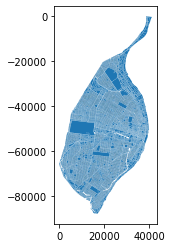

In [49]:
shape.plot()
